total number of iterations = 11
iteration 1000: step size = 0.00017858209017001473, x = [17.99145428619438, -0.2095459677970902]
iteration 2000: step size = 0.00017858209017001473, x = [26.040153983905856, -0.3720560297752717]
iteration 3000: step size = 0.00017858209017001473, x = [31.21799959681257, -0.45955390377271127]
iteration 4000: step size = 0.00017858209017001473, x = [34.59715832344061, -0.5126925767314476]
iteration 5000: step size = 0.00013393656762751105, x = [36.787694859943954, -0.5455477594971938]
iteration 6000: step size = 0.00017858209017001473, x = [38.198483791888826, -0.5670996701950255]
iteration 7000: step size = 0.00017858209017001473, x = [39.102320132256715, -0.5797272263583396]
iteration 8000: step size = 0.00017858209017001473, x = [39.681348119610256, -0.5879726531928692]
iteration 9000: step size = 0.00017858209017001473, x = [40.05071105453841, -0.5933413216706875]
iteration 10000: step size = 0.00017858209017001473, x = [40.285214641449606, -0.59666391

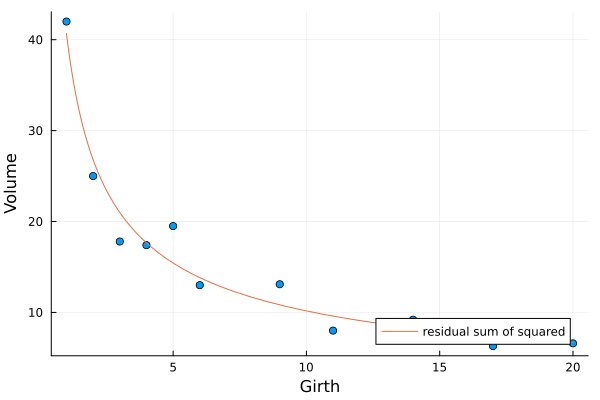

In [1]:
using Symbolics
using DataFrames
using CSV
using StatsModels 
using LinearAlgebra
using Random
using Plots
a = [19,2,9,4,5,6,3,11,14,17,1,20]
b = [7.9,25.0,13.1, 17.4, 19.5,13.0, 17.8,8.0,9.2,6.3,42.0,6.6]

function linesearch(f, ∇f, x, p,strong=true) # implemented wolfe condition in this function
    c1 = .1
    c2 = .9
    check = true
    α=1
    if strong
        while check 
            if f(x+α*p) <= f(x)+ c1*α*transpose(∇f(x))*p && abs(transpose(∇f(x+α*p))*p) <= c2*abs(transpose(∇f(x))*p)
                check = false
                break
            end
            α= α * .75
        end
    else
        while check #loops until the if conditions passes 
            if f(x+α*p) <= f(x)+ c1*α*transpose(∇f(x))*p && transpose(∇f(x+α*p))*p >= c2*transpose(∇f(x))*p
                check = false
                break
            end
            α = α *.75 #new alpha 
        
        end
    end 
    return α
end
function line_search(f, ∇f, x, p)
    α = 1    # initial step length = 1 required for newton-like methods
    rho = 0.75
    c = 1e-4
    while f(x + α*p) > f(x) + c*α*transpose(∇f(x))*p
        # sufficient decrease not met, reduce step size
        α = rho * α
    end
    return α
end

function steepest_descent(f, ∇f, x; ϵ=1e-1, k=1000)
    i = 1
    α =1   
    while norm(∇f(x)) > ϵ
        # compute the direction
        B = -I       # steepest descent
        p = B * ∇f(x)
        # determine the step size
        α = linesearch(f, ∇f, x, p)
        x = x + α*p  # the new iterate
        if i % k == 0
            println("iteration ", i, ": step size = ", α, ", x = ", x)
        end
        i += 1
    end
    return x
    
    
end

function cholesky_plus(∇h,x)
    e = .0001
    A = ∇h(x)
    J = diag(A)
    if minimum(J) > 0
        t = 0
    else 
        t = -minimum(J) + e
    end

    for k in 1:10000
        try
            UP = cholesky(A)
            return UP.L
        catch e
            t = max(2*t, .0001)
            A = A + t*I
        end
    end
    println("we are giving up after 1000 trys")
end




function newton(f, ∇f,∇h, x; tol=0.01)
    i = 0
    α=1

    while norm(∇f(x)) > tol
        U  = cholesky_plus(∇h, x)  # lower triangle matrix 
        B = -inv(U*U')
        p = B*∇f(x)
        α = line_search(f, ∇f, x, p)
        x = x+ α*p
        i += 1 
    end
    println("total number of iterations = ", i)
    return x
end


f(x) = (6.3 - x[1]*(17^x[2]))^2 + (25.0 - x[1]*(2^x[2]))^2 + (6.6 - x[1]*(20^x[2]))^2 + (17.4 - x[1]*(4^x[2]))^2 + (8.0 - x[1]*(11^x[2]))^2 + (9.2 - x[1]*(14^x[2]))^2 + (13.0 - x[1]*(6^x[2]))^2 + (13.1 - x[1]*(9^x[2]))^2 + (7.9 - x[1]*(19^x[2]))^2 + (17.8 - x[1]*(3^x[2]))^2 + (42.0 - x[1]*(1^x[2]))^2 + (19.5 - x[1]*(5^x[2]))^2

function ∇f(x)
    return [(6^x[2])*(2x[1]*(6^x[2]) - 26.0) + (11^x[2])*(2x[1]*(11^x[2]) - 16.0) + (14^x[2])*(2x[1]*(14^x[2]) - 18.4) + (17^x[2])*(2x[1]*(17^x[2]) - 12.6) + (2^x[2])*(2x[1]*(2^x[2]) - 50.0) + (9^x[2])*(2x[1]*(9^x[2]) - 26.2) + (4^x[2])*(2x[1]*(4^x[2]) - 34.8) + (20^x[2])*(2x[1]*(20^x[2]) - 13.2) + (3^x[2])*(2x[1]*(3^x[2]) - 35.6) + (5^x[2])*(2x[1]*(5^x[2]) - 39.0) + (1^x[2])*(2x[1]*(1^x[2]) - 84.0) + (19^x[2])*(2x[1]*(19^x[2]) - 15.8), 1.791759469228055x[1]*(6^x[2])*(2x[1]*(6^x[2]) - 26.0) + 1.0986122886681098x[1]*(3^x[2])*(2x[1]*(3^x[2]) - 35.6) + 2.833213344056216x[1]*(17^x[2])*(2x[1]*(17^x[2]) - 12.6) + 2.995732273553991x[1]*(20^x[2])*(2x[1]*(20^x[2]) - 13.2) + 2.9444389791664403x[1]*(19^x[2])*(2x[1]*(19^x[2]) - 15.8) + 1.3862943611198906x[1]*(4^x[2])*(2x[1]*(4^x[2]) - 34.8) + 2.1972245773362196x[1]*(9^x[2])*(2x[1]*(9^x[2]) - 26.2) + 2.3978952727983707x[1]*(11^x[2])*(2x[1]*(11^x[2]) - 16.0) + 2.6390573296152584x[1]*(14^x[2])*(2x[1]*(14^x[2]) - 18.4) + 1.6094379124341003x[1]*(5^x[2])*(2x[1]*(5^x[2]) - 39.0) + 0.6931471805599453x[1]*(2^x[2])*(2x[1]*(2^x[2]) - 50.0)]
end
    
function ∇h(x)
    return [2(1^(2x[2])) + 2(2^(2x[2])) + 2(3^(2x[2])) + 2(4^(2x[2])) + 2(5^(2x[2])) + 2(6^(2x[2])) + 2(9^(2x[2])) + 2(11^(2x[2])) + 2(14^(2x[2])) + 2(17^(2x[2])) + 2(19^(2x[2])) + 2(20^(2x[2])) 0.6931471805599453(2^x[2])*(2x[1]*(2^x[2]) - 50.0) + 1.3862943611198906x[1]*(2^(2x[2])) + 1.791759469228055(6^x[2])*(2x[1]*(6^x[2]) - 26.0) + 2.3978952727983707(11^x[2])*(2x[1]*(11^x[2]) - 16.0) + 2.6390573296152584(14^x[2])*(2x[1]*(14^x[2]) - 18.4) + 2.772588722239781x[1]*(4^(2x[2])) + 5.8888779583328805x[1]*(19^(2x[2])) + 2.833213344056216(17^x[2])*(2x[1]*(17^x[2]) - 12.6) + 2.1972245773362196(9^x[2])*(2x[1]*(9^x[2]) - 26.2) + 1.3862943611198906(4^x[2])*(2x[1]*(4^x[2]) - 34.8) + 1.0986122886681098(3^x[2])*(2x[1]*(3^x[2]) - 35.6) + 1.6094379124341003(5^x[2])*(2x[1]*(5^x[2]) - 39.0) + 2.1972245773362196x[1]*(3^(2x[2])) + 3.2188758248682006x[1]*(5^(2x[2])) + 2.995732273553991(20^x[2])*(2x[1]*(20^x[2]) - 13.2) + 2.9444389791664403(19^x[2])*(2x[1]*(19^x[2]) - 15.8) + 3.58351893845611x[1]*(6^(2x[2])) + 4.394449154672439x[1]*(9^(2x[2])) + 4.795790545596741x[1]*(11^(2x[2])) + 5.278114659230517x[1]*(14^(2x[2])) + 5.666426688112432x[1]*(17^(2x[2])) + 5.991464547107982x[1]*(20^(2x[2])); 0.6931471805599453(2^x[2])*(2x[1]*(2^x[2]) - 50.0) + 1.3862943611198906x[1]*(2^(2x[2])) + 1.791759469228055(6^x[2])*(2x[1]*(6^x[2]) - 26.0) + 2.3978952727983707(11^x[2])*(2x[1]*(11^x[2]) - 16.0) + 2.6390573296152584(14^x[2])*(2x[1]*(14^x[2]) - 18.4) + 2.772588722239781x[1]*(4^(2x[2])) + 5.8888779583328805x[1]*(19^(2x[2])) + 2.833213344056216(17^x[2])*(2x[1]*(17^x[2]) - 12.6) + 2.1972245773362196(9^x[2])*(2x[1]*(9^x[2]) - 26.2) + 1.3862943611198906(4^x[2])*(2x[1]*(4^x[2]) - 34.8) + 1.0986122886681098(3^x[2])*(2x[1]*(3^x[2]) - 35.6) + 1.6094379124341003(5^x[2])*(2x[1]*(5^x[2]) - 39.0) + 2.1972245773362196x[1]*(3^(2x[2])) + 3.2188758248682006x[1]*(5^(2x[2])) + 2.995732273553991(20^x[2])*(2x[1]*(20^x[2]) - 13.2) + 2.9444389791664403(19^x[2])*(2x[1]*(19^x[2]) - 15.8) + 3.58351893845611x[1]*(6^(2x[2])) + 4.394449154672439x[1]*(9^(2x[2])) + 4.795790545596741x[1]*(11^(2x[2])) + 5.278114659230517x[1]*(14^(2x[2])) + 5.666426688112432x[1]*(17^(2x[2])) + 5.991464547107982x[1]*(20^(2x[2])) 0.9609060278364028(x[1]^2)*(2^(2x[2])) + 2.413897921625164(x[1]^2)*(3^(2x[2])) + 3.843624111345611(x[1]^2)*(4^(2x[2])) + 5.180580787960469(x[1]^2)*(5^(2x[2])) + 6.420803991136802(x[1]^2)*(6^(2x[2])) + 9.655591686500657(x[1]^2)*(9^(2x[2])) + 11.499803478617546(x[1]^2)*(11^(2x[2])) + 13.929247177992037(x[1]^2)*(14^(2x[2])) + 16.054195705876413(x[1]^2)*(17^(2x[2])) + 17.339441804069416(x[1]^2)*(19^(2x[2])) + 17.948823709625927(x[1]^2)*(20^(2x[2])) + 3.210401995568401x[1]*(6^x[2])*(2x[1]*(6^x[2]) - 26.0) + 1.206948960812582x[1]*(3^x[2])*(2x[1]*(3^x[2]) - 35.6) + 8.027097852938207x[1]*(17^x[2])*(2x[1]*(17^x[2]) - 12.6) + 8.974411854812963x[1]*(20^x[2])*(2x[1]*(20^x[2]) - 13.2) + 8.669720902034708x[1]*(19^x[2])*(2x[1]*(19^x[2]) - 15.8) + 1.9218120556728056x[1]*(4^x[2])*(2x[1]*(4^x[2]) - 34.8) + 4.827795843250328x[1]*(9^x[2])*(2x[1]*(9^x[2]) - 26.2) + 5.749901739308773x[1]*(11^x[2])*(2x[1]*(11^x[2]) - 16.0) + 6.964623588996019x[1]*(14^x[2])*(2x[1]*(14^x[2]) - 18.4) + 0.4804530139182014x[1]*(2^x[2])*(2x[1]*(2^x[2]) - 50.0) + 2.5902903939802346x[1]*(5^x[2])*(2x[1]*(5^x[2]) - 39.0)]
end


x1=[1.1,1.1]


n = newton(f, ∇f,∇h,x1)
algo1 = steepest_descent(f,∇f ,x1)
# the newton's method is definitely the faster algorithm with better performance.
# There were only 11 iterations compared to the steepest descent
#which has over 5000 iterations.

scatter(a, b, label="", xlabel="Girth", ylabel="Volume")
h(y) = n[1]*y^n[2]
plot!(h, label = "residual sum of squared", legend = :bottomright)